In [76]:
using Pkg

function install_missing_package(package_name::String)
    if !haskey(Pkg.installed(), package_name)
        println("Package \""*package_name*"\" is missing.")
        println("Installing package...")
        Pkg.add(package_name)
    else
        println("Package \""*package_name*"\" is already installed.")
    end
     println("=======================================================")
end

install_missing_package("Eirene")
install_missing_package("DelimitedFiles")
install_missing_package("PyCall")
install_missing_package("Plots")

Packege "Eirene" is already installed.
Packege "DelimitedFiles" is already installed.
Packege "PyCall" is already installed.
Packege "Plots" is already installed.


In [77]:
using Eirene
using DelimitedFiles
using PyCall
using Plots

# Load file:

## a) from ".npy" file with numpy:

In [67]:
PyAny = py"""
        import numpy as np
        import matplotlib.pyplot as plt

        file_name = "SyllableEncoding.npy"

        py_symm_matrtix = np.load(file_name, allow_pickle=True, encoding="latin1")
        """
py_symmetric_matrtix = PyArray(py"py_symm_matrtix"o)
symmetric_matrix = Array(py_symmetric_matrtix)

0-dimensional Array{Ptr{PyCall.PyObject_struct},0}:
Ptr{PyCall.PyObject_struct} @0x00007ff767074ab0

## b) from ".txt" or ".csv" file with julia:

In [106]:
file_name = "geometric_matrix.csv"
symmetric_matrix = readdlm( file_name, ',', Float64, '\n')

88×88 Array{Float64,2}:
 -0.0      -1.60516  -1.90945  -1.94002  …  -2.03195  -2.01851  -2.03503
 -1.60516  -0.0      -2.29804  -2.02607     -2.28394  -2.2282   -1.90151
 -1.90945  -2.29804  -0.0      -1.82546     -1.8289   -1.9917   -1.77322
 -1.94002  -2.02607  -1.82546  -0.0         -1.41806  -2.06462  -1.76601
 -1.81612  -1.7213   -1.53475  -1.64958     -1.6405   -1.71493  -1.71061
 -1.93578  -1.82805  -1.89436  -1.98095  …  -1.8461   -1.6416   -2.11018
 -1.66126  -2.25149  -1.59408  -1.44589     -1.34764  -2.2408   -2.2444 
 -2.12454  -2.01978  -1.86169  -1.6309      -1.9634   -1.45876  -1.5732 
 -1.78224  -1.65628  -1.83661  -2.11815     -1.95288  -2.33634  -2.03188
 -1.92628  -2.15528  -2.21956  -2.13095     -2.08726  -1.6623   -1.93402
 -1.95167  -1.70403  -1.86761  -1.88476  …  -1.94075  -2.08954  -2.01846
 -1.85942  -1.84088  -1.48782  -1.67952     -1.34884  -1.79314  -1.84608
 -1.68598  -2.11034  -1.87599  -2.23594     -2.17369  -2.16442  -2.07313
  ⋮                        

# Preprocessing

## Ordering of the matrix

In [107]:
function get_ordered_matrix(input_matrix)
    mat_size = size(input_matrix,1)
    ordered_matrix = zeros(Int, mat_size, mat_size)

    # ====
    # Get all cartesian indices from input matrix
    matrix_indices = CartesianIndices((1:mat_size, 1:mat_size))
    # Filter out indices below diagonal
    matrix_indices = findall(x->x[1]>x[2], matrix_indices)

    # Count elements above diagonal
    repetition_number = Int(ceil((mat_size * (mat_size-1))/2))
   
    # Get all values which will be sorted
    sorted_values = input_matrix[matrix_indices]

    # Sort indices by values (starting with lowest)
    ordered_indices = sort!([1:repetition_number;],
                        by=i->(sorted_values[i],matrix_indices[i]))

    for k=1:repetition_number
        next_position = ordered_indices[k]
        matrix_index = matrix_indices[next_position]
        ordered_matrix[matrix_index] = k
        ordered_matrix[matrix_index[2], matrix_index[1]] = k
    end

    # ====
    # Check the ordering
    non_zero_input = findall(x->x!=0,input_matrix)
    min_orig = findmin(input_matrix[non_zero_input])[2]
    max_new = findall(x->x==1,ordered_matrix)[1]
    println("Check:")
    println("\tOriginal minimal value was at position: \t"*string(non_zero_input[min_orig]))
    println("\tAfter ordering the first index value is at position: \t"*string(max_new))
    return ordered_matrix
end

get_ordered_matrix (generic function with 1 method)

### Simple check of ordering

In [108]:
a = [ 0 11 12;
     11  0 13;
     12 13  0];
get_ordered_matrix(a)

Check:
	Original minimal value was at position: 	CartesianIndex(2, 1)
	After ordering the first index value is at position: 	CartesianIndex(2, 1)


3×3 Array{Int64,2}:
 0  1  2
 1  0  3
 2  3  0

## Order input matrix

In [114]:
las_index = 60
ordered_matrix = get_ordered_matrix(symmetric_matrix[1:las_index,1:las_index])

Check:
	Original minimal value was at position: 	CartesianIndex(15, 13)
	After ordering the first index value is at position: 	CartesianIndex(15, 13)


60×60 Array{Int64,2}:
    0  1467   694   619   964   628  …  1584   388  1692   965  1577  1517
 1467     0    51   423  1211   930     1604  1325  1037  1029   224  1607
  694    51     0   939  1567   741     1433  1173  1019  1138   526   925
  619   423   939     0  1381   517     1305  1210   380   189   657   854
  964  1211  1567  1381     0  1725     1650  1762  1237  1059   552  1559
  628   930   741   517  1725     0  …  1193  1680   956  1610  1099  1055
 1356    90  1477  1668  1516   281     1096   489   539    85   607   531
  251   435   836  1417  1228  1208     1382  1708  1209  1231   227   395
 1053  1368   908   261  1402   744     1116  1391   848  1546   255   467
  646   198   124   238  1649   478     1279  1034   507   125   872   641
  595  1256   818   763  1691   506  …  1528  1025   738    68   355  1456
  844   898  1620  1318  1766  1653     1510  1675  1424  1344   916  1638
 1308   280   787   110  1451   324     1520   613   334   617   106   229
   

# Topological analysis

## Use Eirene

In [116]:
maximal_dimension = 5

persistance_analysis = eirene(ordered_matrix,maxdim=maximal_dimension)

Dict{String,Any} with 12 entries:
  "symmat"   => [1578 1186 … 878 1057; 1186 1578 … 581 1026; … ; 878 581 … 1578…
  "maxnz"    => [0, 663, 7431, 73608, 644380, 4671836, 26771464, 0]
  "firstv"   => Array{Int64,1}[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  52, 53, 54, 5…
  "cyclerep" => Array{Array{Int64,1},1}[[], [[1, 12], [6, 8], [5, 25], [1, 20],…
  "phi"      => Array{Int64,1}[[], [11, 277, 243, 573, 180, 20, 288, 401, 668, …
  "plo"      => Array{Int64,1}[[], [12, 8, 25, 20, 14, 22, 19, 37, 28, 23  …  7…
  "ocg2rad"  => [1577.0, 1576.0, 1575.0, 1574.0, 1573.0, 1572.0, 1571.0, 1570.0…
  "farfaces" => Array{Int64,1}[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  51, 52, 53, 5…
  "nvl2ovl"  => [15, 59, 28, 24, 30, 50, 32, 47, 2, 51  …  35, 26, 17, 56, 19, …
  "input"    => Dict{String,Any}("genera"=>[0 1467 … 1577 1517; 1467 0 … 224 16…
  "tid"      => Array{Int64,1}[[], [12, 8, 25, 20, 14, 22, 19, 37, 28, 23  …  1…
  "grain"    => Array{Int64,1}[[1578, 1578, 1578, 1578, 1578, 1578, 1578, 1578,…

## Compute Betti curves

In [120]:
minimal_betti = 1
maximal_betti = maximal_dimension

bettis  = Matrix{Float64}[]
for d =minimal_betti:(maximal_betti+1)
    result = betticurve(persistance_analysis, dim=d)
    push!(bettis, result)
end
# bettis

6-element Array{Array{Float64,2},1}:
 [0.0 0.0; 1.0 0.0; … ; 1576.0 0.0; 1577.0 0.0]
 [0.0 0.0; 1.0 0.0; … ; 1576.0 0.0; 1577.0 0.0]
 [0.0 0.0; 1.0 0.0; … ; 1576.0 0.0; 1577.0 0.0]
 [0.0 0.0; 1.0 0.0; … ; 1576.0 0.0; 1577.0 0.0]
 [0.0 0.0; 1.0 0.0; … ; 1576.0 0.0; 1577.0 0.0]
 Array{Float64}(undef,0,2)                     

## Plot betti curves

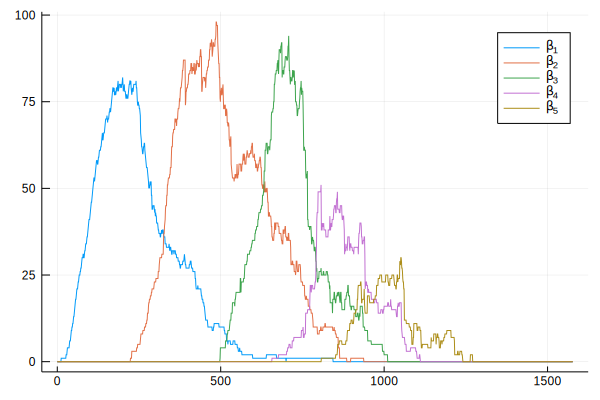

In [118]:
plot_ref = plot(title="");

for p = (minimal_betti):(maximal_betti)
    plot!(bettis[p][:,1], bettis[p][:,2], label="\\beta_"*string(p),)
end

plot_ref

## Plot heatmap of ordering matrix

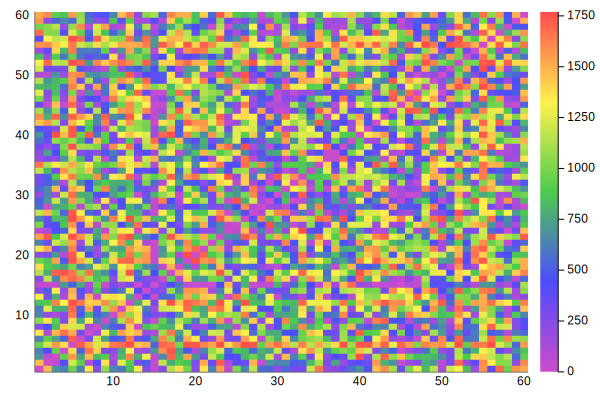

In [119]:
heatmap(ordered_matrix,  color=:lightrainbow)